In [10]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture3')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (46/46), done.
^Cceiving objects:  88% (166/188), 23.30 MiB | 7.56 MiB/s     


In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Color Histogram

### Histograms - grayscale/color
- use `cv2.calHist(imgs, channel, mask, nbins, ranges)`
- imgs must be a LIST, otherwise it will return results, but in a very werid way
- channel could be [0] for grayscale or [0, 1, 2] for RGB colors. 
- and accordingly nbins could be a list of 1 or a list of 3 (must be a list thought, otherwise very weird error), 
- ranges is usually [0, 256] for rgb

### Notes:
- grayscale images by `imread(path, cv2.IMREAD_GRAYSCALE)` is very different from loading the color image, and then `cv2.cvtColor`, and generally we should stick with the second method like all the time (otherwise the histogram is wreid)

# Why we should know this

## Night Vision problem in Kaggle

### competition :  https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring
### interview of 1st place : http://blog.kaggle.com/2017/07/07/the-nature-conservancy-fisheries-monitoring-competition-1st-place-winners-interview-team-towards-robust-optimal-learning-of-learning/

![title](img/NightVisionComp.png)

![title](img/histogram.png)

# CODE

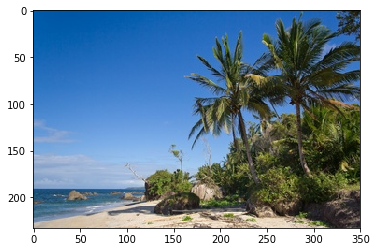

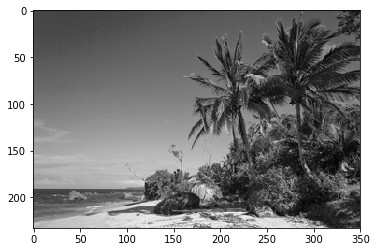

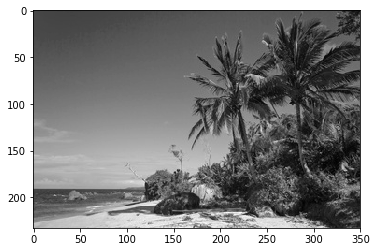

In [12]:
beach = cv2.imread("data/beach.jpg")[:,:,::-1]
beach_gray = cv2.imread("data/beach.jpg", cv2.IMREAD_GRAYSCALE)
#cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

plt.imshow(beach)
plt.figure()
plt.imshow(beach_gray, cmap = plt.cm.gray)
plt.figure()
plt.imshow(cv2.cvtColor(beach[:,:,::-1], cv2.COLOR_BGR2GRAY), cmap = plt.cm.gray)

In [13]:
np.all(beach_gray == cv2.cvtColor(beach[:,:,::-1], cv2.COLOR_BGR2GRAY))

False

In [14]:
np.all(beach_gray == cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY))

False

In [15]:
np.all(cv2.cvtColor(beach[:,:,::-1], cv2.COLOR_BGR2GRAY) 
       == cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY))

True

In [16]:
beach_gray = cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

In [17]:
np.max(beach_gray)

250

(256, 1)


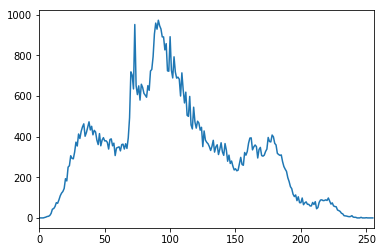

In [21]:
## gray scale hist 
gray_hist = cv2.calcHist([beach_gray], [0], mask = None, histSize = [256], ranges = [0, 256])

plt.plot(gray_hist)
plt.xlim([0, 256])
print(gray_hist.shape)

###See what if you forgot to wrap your image into a list!!!

(256, 1)


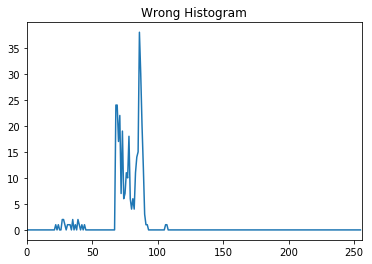

In [23]:
gray_hist = cv2.calcHist(beach_gray, [0], mask = None, histSize = [256], ranges = [0, 256])

plt.plot(gray_hist)
plt.xlim([0, 256])
plt.title("Wrong Histogram")
print(gray_hist.shape)

### As a result, I'd rather stick with plt and np

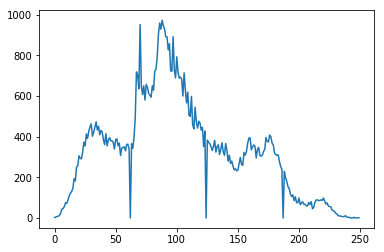

In [24]:
gray_histm, _ = np.histogram(beach_gray.ravel(), bins = 250, )
plt.plot(gray_histm)

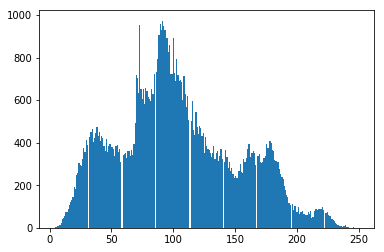

In [25]:
_ = plt.hist(beach_gray.ravel(), bins = 255)

**color histogram INDEPENDENTLY**

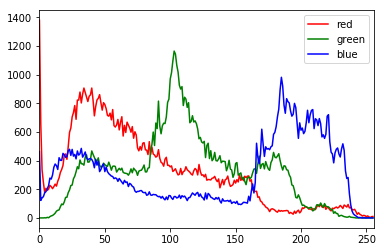

In [26]:
for i, col in enumerate(["red", "green", "blue"]):
    col_img = beach[:, :, i]
    col_hist = cv2.calcHist([col_img], [0], mask = None, 
                         histSize = [256], ranges = [0, 256])
    plt.plot(col_hist, color = col, label = col)

plt.xlim([0, 256])
plt.legend()

two peaks in blue are probably sea and sky. the peak in green are leaves, whereas the peak in red are from the yellow trucks or rocks

**color histogram COMBINATORIALLY**

<Figure size 432x288 with 0 Axes>

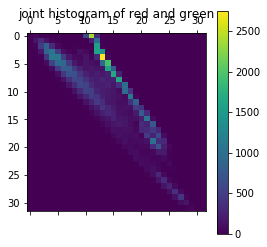

<Figure size 432x288 with 0 Axes>

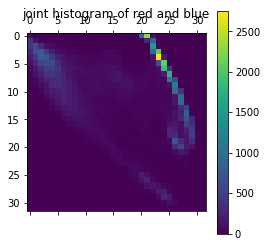

<Figure size 432x288 with 0 Axes>

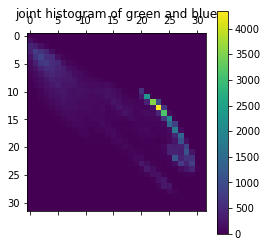

In [27]:
r, g, b = cv2.split(beach)
channels = {"red": r, "green": g, "blue": b}
import itertools

for c1, c2 in list(itertools.combinations(channels, 2)):
    
    rg_hist = cv2.calcHist([channels[c1], channels[c2]], [0, 1], 
                           None, [32, 32], [0, 256, 0, 256])
    plt.figure()
    plt.matshow(rg_hist)
    plt.colorbar()
    plt.title("joint histogram of %s and %s" % (c1, c2))

### Histogram Equalization
- Histogram equalization improves the contrast of an image by “stretching” the distribution of pixels.
- equalization is usually a nonlinear transformation of pixels (shape change of histogram), compared to histogram normalization, which is usually a linear transformation
- its only applicable to grayscale images, to improve global contrast
- its SPECIALLY USEFUL when when an image contains foregrounds and backgrounds that are BOTH DARK or BOTH BRIGHT (e.g., medical images or satellite images)

## Example is below

![title](img/histogram-equalization.png)

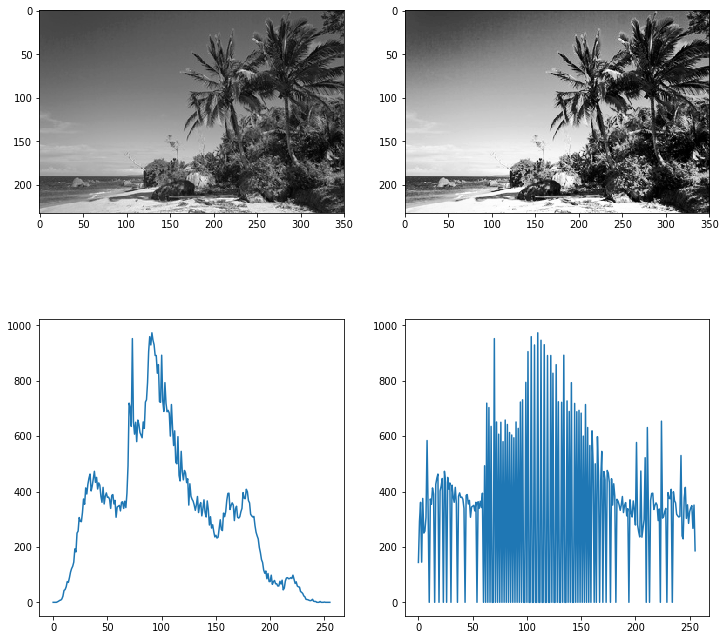

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (2 * 6, 2 * 6))
equalized_gray = cv2.equalizeHist(beach_gray, )
axes[0, 0].imshow(beach_gray, cmap = plt.cm.gray)
axes[0, 1].imshow(equalized_gray, cmap = plt.cm.gray)

axes[1, 0].plot(cv2.calcHist([beach_gray], [0], None, [256], [0, 256], ))
axes[1, 1].plot(cv2.calcHist([equalized_gray], [0], None, [256], [0, 256], ))